# Transfer Learning MNIST

* Train a simple convnet on the MNIST dataset the first 5 digits [0-4].
* Freeze convolutional layers and fine-tune dense layers for the classification of digits [5-9].

## MNIST Dataset
The MNIST database contains 60,000 training images and 10,000 testing images taken from American Census Bureau employees and American high school students. The MNIST dataset is one of the most common datasets used for image classification and accessible from many different sources. In fact, even Tensorflow and Keras allow us to import and download the MNIST dataset directly from their API.

Let's import keras and load MNIST dataset

In [1]:
# Initialize the random number generator
import random
random.seed(0)
import keras

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
from keras.backend import backend
from keras.datasets import mnist

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train and X_test contain greyscale RGB codes (from 0 to 255) while y_train and y_test contains labels from 0 to 9 which represents which number they actually are.

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

Let's visualize some numbers using matplotlib

Label: 0


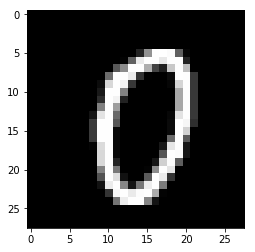

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y_train[1000]))
plt.imshow(X_train[1000], cmap='gray')

## Question 1

### Create two datasets
- First having digits from 0 to 4
- Second having digits from 5 to 9

Hint: use labels to separate data

In [5]:
X_train_0_4_base = X_train[(y_train >= 0) & (y_train < 5)]
X_test_0_4_base = X_test[(y_test >= 0) & (y_test < 5)]

## Question 2

### Print shape of the data
- print shape of all variables of both the datasets you created

In [6]:
X_train_0_4_base.shape

(30596, 28, 28)

In [7]:
X_test_0_4_base.shape

(5139, 28, 28)

## Question 3

### Reshape data
- reshape first dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [8]:
img_rows, img_cols, channels = X_train_0_4_base.shape[1], X_train_0_4_base.shape[2], 1
input_shape = (img_rows, img_cols, channels)
input_shape

(28, 28, 1)

In [9]:
# Reshape Train & Test for 0-4 number dataset
X_train_0_4 = X_train_0_4_base.reshape(X_train_0_4_base.shape[0], img_rows, img_cols, channels)
X_test_0_4 = X_test_0_4_base.reshape(X_test_0_4_base.shape[0], img_rows, img_cols, channels)

In [10]:
X_train_0_4.shape, X_test_0_4.shape

((30596, 28, 28, 1), (5139, 28, 28, 1))

## Question 4

### Normalize data
- normalize first dataset
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [11]:
X_train_0_4 = X_train_0_4.astype('float32')
X_test_0_4 = X_test_0_4.astype('float32')

#Normalizing the input
X_train_0_4 /= 255
X_test_0_4 /= 255

### Print shape of data and number of images
- for first dataset
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [12]:
print("Train Dataset:")
print('\tShape : ', X_train_0_4.shape)
print('\tNo. of Records : ', X_train_0_4.shape[0])

print("Test Dataset:")
print('\tShape : ', X_test_0_4.shape)
print('\tNo. of Records : ', X_test_0_4.shape[0])

Train Dataset:
	Shape :  (30596, 28, 28, 1)
	No. of Records :  30596
Test Dataset:
	Shape :  (5139, 28, 28, 1)
	No. of Records :  5139


## Question 5

### One-hot encode the class vector
- encode labels of first dataset
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [13]:
y_train_0_4 = y_train[(y_train >= 0) & (y_train < 5)]
y_test_0_4 = y_test[(y_test >= 0) & (y_test < 5)]

In [14]:
y_train_0_4.shape, y_test_0_4.shape

((30596,), (5139,))

In [15]:
num_classes = 5
y_train_0_4 = keras.utils.to_categorical(y_train_0_4, num_classes)
y_test_0_4 = keras.utils.to_categorical(y_test_0_4, num_classes)

## Question 6
We will build our model by using high level Keras.

### Initialize a sequential model
- define a sequential model
- add 2 convolutional layers
    - no of filters: 32
    - kernel size: 3x3
    - activation: "relu"
    - input shape: (28, 28, 1) for first layer
- add a max pooling layer of size 2x2
- add a dropout layer
    - dropout layers fight with the overfitting by disregarding some of the neurons while training
    - use dropout rate 0.2

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [17]:
#Initialize the model
model = Sequential()

#Add two Convolutional Layers with 32 filters of size 3X3 and activation function as 'ReLU' 
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, name='conv_1'))

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape, name='conv_2'))


#Add a MaxPooling Layer of size 2X2 
model.add(MaxPooling2D(pool_size=(2, 2),name='max_1'))

#Apply Dropout with 0.20 probability 
model.add(Dropout(0.20,name='drop_1'))

W1013 15:30:44.944682 14804 deprecation_wrapper.py:119] From C:\Users\Beejal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1013 15:30:44.974590 14804 deprecation_wrapper.py:119] From C:\Users\Beejal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1013 15:30:44.982582 14804 deprecation_wrapper.py:119] From C:\Users\Beejal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1013 15:30:45.063345 14804 deprecation_wrapper.py:119] From C:\Users\Beejal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W1013 15:30:45.067336 14804 deprecation_wrapper.py:119] From C:\Users\Beeja

## Question 7

### Add classification layers
- do this after doing question 6
- flatten the data
    - add Flatten later
    - flatten layers flatten 2D arrays to 1D array before building the fully connected layers
- add 2 dense layers
    - number of neurons in first layer: 128
    - number of neurons in last layer: number of classes
    - activation function in first layer: relu
    - activation function in last layer: softmax
    - we may experiment with any number of neurons for the first Dense layer; however, the final Dense layer must have neurons equal to the number of output classes
- you can add a dropout layer in between, if necessary

In [18]:
#Flatten the layer
model.add(Flatten())

#Add Fully Connected Layer with 128 units and activation function as 'ReLU'
model.add(Dense(128, activation='relu',name='dense_1'))

#Apply Dropout with 0.5 probability 
model.add(Dropout(0.5,name='drop_2'))

#Add Fully Connected Layer with 10 units and activation function as 'softmax'
model.add(Dense(num_classes, activation='softmax',name='dense_2'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 32)        9248      
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 12, 12, 32)        0         
_________________________________________________________________
drop_1 (Dropout)             (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
drop_2 (Dropout)             (None, 128)              

## Question 8

### Compile and fit the model
- compile your model
    - loss: "categorical_crossentropy"
    - metrics: "accuracy"
    - optimizer: "sgd"
- fit your model
    - give train data - features and labels
    - batch size: 128
    - epochs: 10
    - give validation data - features and labels

In [19]:
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy

#To use SGD optimizer for learning weights with learning rate = 0.01
optimizer = SGD(lr=0.01)
#Set the loss function and optimizer for the model training
model.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

W1013 15:30:45.256755 14804 deprecation_wrapper.py:119] From C:\Users\Beejal\Anaconda3\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1013 15:30:45.273673 14804 deprecation_wrapper.py:119] From C:\Users\Beejal\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3576: The name tf.log is deprecated. Please use tf.math.log instead.



In [20]:
batch_size=128
epochs = 10

In [21]:
#Training on the dataset
model.fit(X_train_0_4, y_train_0_4,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_0_4, y_test_0_4))

W1013 15:30:45.447423 14804 deprecation.py:323] From C:\Users\Beejal\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 30596 samples, validate on 5139 samples
Epoch 1/10
30596/30596 [==============================] - 13s 439us/step - loss: 0.6452 - acc: 0.7922 - val_loss: 0.1275 - val_acc: 0.9663
Epoch 2/10
30596/30596 [==============================] - 9s 289us/step - loss: 0.1952 - acc: 0.9398 - val_loss: 0.1219 - val_acc: 0.9667
Epoch 3/10
30596/30596 [==============================] - 9s 287us/step - loss: 0.1636 - acc: 0.9496 - val_loss: 0.0760 - val_acc: 0.9778
Epoch 4/10
30596/30596 [==============================] - 9s 292us/step - loss: 0.1407 - acc: 0.9569 - val_loss: 0.0669 - val_acc: 0.9805
Epoch 5/10
30596/30596 [==============================] - 9s 292us/step - loss: 0.1302 - acc: 0.9605 - val_loss: 0.0607 - val_acc: 0.9809
Epoch 6/10
30596/30596 [==============================] - 9s 290us/step - loss: 0.1193 - acc: 0.9632 - val_loss: 0.0556 - val_acc: 0.9844
Epoch 7/10
30596/30596 [==============================] - 9s 297us/step - loss: 0.1095 - acc: 0.9675 - val_loss: 0.0500 - 

## Question 9

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [22]:
score = model.evaluate(X_test_0_4, y_test_0_4)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

5139/5139 [==============================] - 1s 158us/step
Test loss: 0.06473822021671329
Test accuracy: 0.9797625997275735


## Question 10

## Transfer learning
Now we will apply this model on second dataset (5-9 digits)

- fix the first convolution layers so that the weights in the convolution layers dont get updated in the process of training
- get the second dataset
- train the last 2 dense layers
- predict the accuracy and loss

### Make only dense layers trainable
- set trainalble = False for all layers other than Dense layers

In [23]:
#Freezing layers in the model which don't have 'dense' in their name
for layer in model.layers:
  if('dense' not in layer.name): #prefix detection to freeze layers which does not have dense
    #Freezing a layer
    layer.trainable = False

#Module to print colourful statements
from termcolor import colored

#Check which layers have been frozen 
for layer in model.layers:
  print (colored(layer.name, 'blue'), colored(layer.trainable, 'red'))

conv_1 False
conv_2 False
max_1 False
drop_1 False
flatten_1 False
dense_1 True
drop_2 False
dense_2 True


### Modify data
- in your second data, class labels will start from 5 to 9 but for keras.utils.to_categorical the labels should start from 0
- so you need to subtract 5 from train and test labels

In [24]:
y_train_5_9 = y_train[(y_train >= 5) & (y_train < 10)]
y_test_5_9 = y_test[(y_test >= 5) & (y_test < 10)]

y_train_5_9 = y_train_5_9 - 5
y_test_5_9 = y_test_5_9 - 5

### Reshape data
- reshape second dataset
- To be able to use the dataset in Keras, we need 4-dims numpy arrays. 
- reshape features to pass it to a Conv2D layer
- channel = 1
- reshape features of first dataset only
- do not reshape labels

In [25]:
X_train_5_9_base = X_train[(y_train > 4) & (y_train < 10)]
X_test_5_9_base = X_test[(y_test > 4) & (y_test < 10)]

# Reshape Train & Test for 5-9 number dataset
X_train_5_9 = X_train_5_9_base.reshape(X_train_5_9_base.shape[0], img_rows, img_cols, channels)
X_test_5_9 = X_test_5_9_base.reshape(X_test_5_9_base.shape[0], img_rows, img_cols, channels)

### Normalize data
- normalize second data
- we must normalize our data as it is always required in neural network models
- we can achieve this by dividing the RGB codes to 255 (which is the maximum RGB code minus the minimum RGB code)
- normalize X_train and X_test
- make sure that the values are float so that we can get decimal points after division

In [26]:
X_train_5_9 = X_train_5_9.astype('float32')
X_test_5_9 = X_test_5_9.astype('float32')

#Normalizing the input
X_train_5_9 /= 255
X_test_5_9 /= 255

### Print shape of data and number of images
- print shape of X_train
- print number of images in X_train
- print number of images in X_test

In [27]:
print("Train Dataset:")
print('\tShape : ', X_train_5_9.shape)
print('\tNo. of Records : ', X_train_5_9.shape[0])

print("Test Dataset:")
print('\tShape : ', X_test_5_9.shape)
print('\tNo. of Records : ', X_test_5_9.shape[0])

Train Dataset:
	Shape :  (29404, 28, 28, 1)
	No. of Records :  29404
Test Dataset:
	Shape :  (4861, 28, 28, 1)
	No. of Records :  4861


### One-hot encode the class vector
- convert class vectors (integers) to binary class matrix
- convert y_train and y_test
- number of classes: 5
- we are doing this to use categorical_crossentropy as loss

Hint: you can use keras.utils.to_categorical

In [28]:
y_train_5_9 = keras.utils.to_categorical(y_train_5_9, num_classes)
y_test_5_9 = keras.utils.to_categorical(y_test_5_9, num_classes)

### Fit the model
- give train data - features and labels
- batch size: 128
- epochs: 10
- give validation data - features and labels

In [29]:
#Training on the dataset
model.fit(X_train_5_9, y_train_5_9,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_5_9, y_test_5_9))

Train on 29404 samples, validate on 4861 samples
Epoch 1/10
29404/29404 [==============================] - 9s 299us/step - loss: 0.5567 - acc: 0.8164 - val_loss: 0.2093 - val_acc: 0.9358
Epoch 2/10
29404/29404 [==============================] - 9s 299us/step - loss: 0.2965 - acc: 0.9056 - val_loss: 0.1520 - val_acc: 0.9539
Epoch 3/10
29404/29404 [==============================] - 9s 301us/step - loss: 0.2442 - acc: 0.9229 - val_loss: 0.1272 - val_acc: 0.9576
Epoch 4/10
29404/29404 [==============================] - 9s 293us/step - loss: 0.2226 - acc: 0.9289 - val_loss: 0.1166 - val_acc: 0.9621
Epoch 5/10
29404/29404 [==============================] - 9s 293us/step - loss: 0.1997 - acc: 0.9369 - val_loss: 0.1067 - val_acc: 0.9665
Epoch 6/10
29404/29404 [==============================] - 9s 296us/step - loss: 0.1867 - acc: 0.9387 - val_loss: 0.0995 - val_acc: 0.9673
Epoch 7/10
29404/29404 [==============================] - 9s 296us/step - loss: 0.1735 - acc: 0.9442 - val_loss: 0.0938 - v

### Evaluate model
- evaluate your model and get accuracy
- use test features and labels

In [30]:
score = model.evaluate(X_test_5_9, y_test_5_9)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4861/4861 [==============================] - 1s 160us/step
Test loss: 0.08235221676148338
Test accuracy: 0.9734622504553709


-----------------------------------------------------------------------------

# Sentiment analysis 

The objective of the second problem is to perform Sentiment analysis from the tweets collected from the users targeted at various mobile devices.
Based on the tweet posted by a user (text), we will classify if the sentiment of the user targeted at a particular mobile device is positive or not.

## Question 1

### Read the data
- read tweets.csv
- use latin encoding if it gives encoding error while loading

In [31]:
import pandas as pd
import numpy as np

In [33]:
tweets = pd.read_csv("tweets.csv", encoding='latin')

In [38]:
tweets.shape

(9093, 3)

In [51]:
tweets.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

### Drop null values
- drop all the rows with null values

In [54]:
tweets[tweets['tweet_text'].isna() == True]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
6,NaN,NaN,No emotion toward brand or product


In [55]:
# There is only one record without a tweet_text, so let's go ahead and drop this record.
# I am making choice of not dropping 5802 records (that have 'emotion_in_tweet_is_directed_at' as null value)

tweets.drop(6, inplace=True)

In [56]:
# Let's check if the null tweet has really been dropped
tweets[tweets['tweet_text'].isna() == True]

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product


### Print the dataframe
- print initial 5 rows of the data
- use df.head()

In [57]:
tweets.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Question 2

### Preprocess data
- convert all text to lowercase - use .lower()
- select only numbers, alphabets, and #+_ from text - use re.sub()
- strip all the text - use .strip()
    - this is for removing extra spaces

In [60]:
"ABCD"

'abcd'

In [63]:
lambda_lower = lambda x: x.lower()

df = tweets.applymap(lambda_lower)
df.head()

AttributeError: ("'float' object has no attribute 'lower'", 'occurred at index emotion_in_tweet_is_directed_at')

print dataframe

## Question 3

### Preprocess data
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - select only those rows where value equal to "positive emotion" or "negative emotion"
- find the value counts of "positive emotion" and "negative emotion"

## Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

### Fit the classifer
- fit logistic regression classifier

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

### Fit the classifer
- fit naive bayes classifier

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score